In [38]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=9,7

In [39]:
h=1.28*20
splot = 1500
dt = h*splot
nwait = 40E6
t_therm = nwait*h

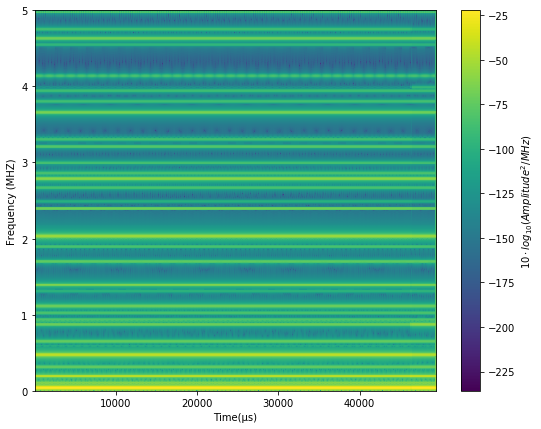

In [40]:
_fbase = './outfiles1/testOut'


maxLen = 0
for i in range(0,10):
    currentLen = len(np.fromfile(open(_fbase + '_00' + str(i) + 'Y1' + '.txt'),dtype='float'))
    if(currentLen > maxLen):
        maxLen = currentLen
    t = np.arange(maxLen)*dt
    _r = t>t_therm

for i in range(10,21):
    currentLen = len(np.fromfile(open(_fbase + '_0' + str(i) + 'Y1' + '.txt'),dtype='float'))
    if(currentLen > maxLen):
        maxLen = currentLen
    t = np.arange(maxLen)*dt
    _r = t>t_therm

allArrays = np.zeros((maxLen))

for i in range(0,10):
    nplist = np.fromfile(open(_fbase + '_00' + str(i) + 'Y1' + '.txt'),dtype='float').tolist()
    while(len(nplist) < maxLen):
        nplist.append(0)
    nplist = np.asarray(nplist)
    for j in range(0, len(nplist)):
        allArrays[j] += nplist[j]

for i in range(10,21):
    nplist = np.fromfile(open(_fbase + '_0' + str(i) + 'Y1' + '.txt'),dtype='float').tolist()
    while(len(nplist) < maxLen):
        nplist.append(0)
    nplist = np.asarray(nplist)
    for j in range(0, len(nplist)):
        allArrays[j] += nplist[j]
        
    
_NFFT=128*16

_dt=dt/1e6

(spec,freq,t,_)=plt.specgram(allArrays[_r],NFFT=_NFFT,Fs=1/_dt,noverlap=_NFFT/2,cmap='viridis')
c=plt.colorbar()
plt.ylim([0,5])
c.set_label('$10\cdot log_{10}(Amplitude^2/MHz)$')
plt.xlabel('Time(\u03BCs)')
plt.ylabel('Frequency (MHZ)')
plt.show()

df=freq[1]-freq[0]

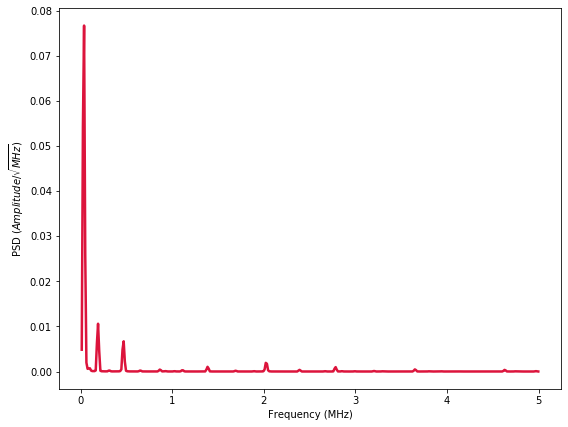

0.011164896179355444


In [41]:
x=np.mean(spec,axis=1)

plt.xlabel('Frequency (MHz)')
plt.ylabel('PSD $(Amplitude/\sqrt{MHz})$')
r=(freq>0)&(freq<5)
plt.plot(freq[r],np.sqrt(x[r]),lw=2.5,color='crimson')
plt.draw()
plt.show()
print(np.sqrt(np.sum(x[r]*df)))